# 16S Analysis Pipeline using DADA2

## Version and History

This pipeline was created by Rose Kantor using the below tutorials and adapted for use by Hannah Greenwald. This is the first pipeline file used to process raw amplicon sequencing data.

Anyone seeking to use this code will need to change the directories and place files in the proper directory with the data. Raw reads will also need to be acquired from NCBI SRA.

based on tutorials:<br>
 https://benjjneb.github.io/dada2/tutorial.html<br>
 https://benjjneb.github.io/dada2/bigdata.html <br>
 https://zenodo.org/record/4587955#.YlBiWZPMI6B

# Process raw MiSeq V4 data using dada2

Prior to this sheet, use terminal to download files to a local directory. 
Don't need to unzip files (fastq.gz --> fastq) 

In [2]:
# sessionInfo()
# getwd()

In [1]:
#install dada2 

# install.packages("devtools")
# library("devtools")
# devtools::install_github("benjjneb/dada2", ref="v1.16") 

#install phyloseq through biocmanager by running this code in a terminal based R session
# https://bioconductor.org/install/

# if (!require("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install(version = "3.12") #might need to update R and update to latest version of Bioconductor
# BiocManager::install("phyloseq")

# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install("Biostrings")

## Load libraries

In [1]:
library(dada2); packageVersion("dada2")
library(repr)
library(ggplot2)
library(phyloseq)
library(Biostrings); packageVersion("Biostrings") 

Loading required package: Rcpp



[1] ‘1.16.0’

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: ‘IRanges’


The following object is masked from ‘package:phyloseq’:

    distance


Loading required package: XVector

Loading required package

[1] ‘2.62.0’

## Examine read quality

In [2]:
directory <- getwd()
setwd(directory)
path <- "./rawdata_stagnation_16S_2022/"
list.files(path)

[1] "bag_072721_control_S90_L001_R1_001.fastq.gz"        
  [2] "bag_072721_control_S90_L001_R2_001.fastq.gz"        
  [3] "BC1F_062320_pre_S69_L001_R1_001.fastq.gz"           
  [4] "BC1F_062320_pre_S69_L001_R2_001.fastq.gz"           
  [5] "BC1F_071420_pre_S84_L001_R1_001.fastq.gz"           
  [6] "BC1F_071420_pre_S84_L001_R2_001.fastq.gz"           
  [7] "BC1W_062320_pre_S68_L001_R1_001.fastq.gz"           
  [8] "BC1W_062320_pre_S68_L001_R2_001.fastq.gz"           
  [9] "BC1W_071420_pre_S89_L001_R1_001.fastq.gz"           
 [10] "BC1W_071420_pre_S89_L001_R2_001.fastq.gz"           
 [11] "BC2W_062320_pre_S70_L001_R1_001.fastq.gz"           
 [12] "BC2W_062320_pre_S70_L001_R2_001.fastq.gz"           
 [13] "BC2W_071420_pre_S85_L001_R1_001.fastq.gz"           
 [14] "BC2W_071420_pre_S85_L001_R2_001.fastq.gz"           
 [15] "BC3F_062320_pre_S72_L001_R1_001.fastq.gz"           
 [16] "BC3F_062320_pre_S72_L001_R2_001.fastq.gz"           
 [17] "BC3F_071420_pre_S87_L001_R1_001.fastq.gz"           
 [18] "BC3F_071420_pre_S87_L001_R2_001.fastq.gz"           
 [19] "BC3W_062320_pre_S71_L001_R1_001.fastq.gz"           
 [20] "BC3W_062320_pre_S71_L001_R2_001.fastq.gz"           
 [21] "BC3W_071420_pre_S86_L001_R1_001.fastq.gz"           
 [22] "BC3W_071420_pre_S86_L001_R2_001.fastq.gz"           
 [23] "BC4F_062320_pre_S74_L001_R1_001.fastq.gz"           
 [24] "BC4F_062320_pre_S74_L001_R2_001.fastq.gz"           
 [25] "BC4F_071420_pre_S67_L001_R1_001.fastq.gz"           
 [26] "BC4F_071420_pre_S67_L001_R2_001.fastq.gz"           
 [27] "BC4W_062320_pre_S73_L001_R1_001.fastq.gz"           
 [28] "BC4W_062320_pre_S73_L001_R2_001.fastq.gz"           
 [29] "BC4W_071420_pre_S88_L001_R1_001.fastq.gz"           
 [30] "BC4W_071420_pre_S88_L001_R2_001.fastq.gz"           
 [31] "bottle_070821_control_S55_L001_R1_001.fastq.gz"     
 [32] "bottle_070821_control_S55_L001_R2_001.fastq.gz"     
 [33] "CTCTAGAA-GACACTGA_S110_L001_R1_001.fastq.gz"        
 [34] "CTCTAGAA-GACACTGA_S110_L001_R2_001.fastq.gz"        
 [35] "D119_051420_pre_S1_L001_R1_001.fastq.gz"            
 [36] "D119_051420_pre_S1_L001_R2_001.fastq.gz"            
 [37] "D119_052120_pre_S9_L001_R1_001.fastq.gz"            
 [38] "D119_052120_pre_S9_L001_R2_001.fastq.gz"            
 [39] "D119_060420_pre_S17_L001_R1_001.fastq.gz"           
 [40] "D119_060420_pre_S17_L001_R2_001.fastq.gz"           
 [41] "D119_060520_pre_S29_L001_R1_001.fastq.gz"           
 [42] "D119_060520_pre_S29_L001_R2_001.fastq.gz"           
 [43] "D119_061120_pre_S32_L001_R1_001.fastq.gz"           
 [44] "D119_061120_pre_S32_L001_R2_001.fastq.gz"           
 [45] "D119_061220_pre_S38_L001_R1_001.fastq.gz"           
 [46] "D119_061220_pre_S38_L001_R2_001.fastq.gz"           
 [47] "D119_071420_pre_S48_L001_R1_001.fastq.gz"           
 [48] "D119_071420_pre_S48_L001_R2_001.fastq.gz"           
 [49] "D1H_051420_pre_S6_L001_R1_001.fastq.gz"             
 [50] "D1H_051420_pre_S6_L001_R2_001.fastq.gz"             
 [51] "D1H_060420_post_S27_L001_R1_001.fastq.gz"           
 [52] "D1H_060420_post_S27_L001_R2_001.fastq.gz"           
 [53] "D1H_060420_pre_S26_L001_R1_001.fastq.gz"            
 [54] "D1H_060420_pre_S26_L001_R2_001.fastq.gz"            
 [55] "D1H_060520_pre_S30_L001_R1_001.fastq.gz"            
 [56] "D1H_060520_pre_S30_L001_R2_001.fastq.gz"            
 [57] "D1H_061220_pre_S45_L001_R1_001.fastq.gz"            
 [58] "D1H_061220_pre_S45_L001_R2_001.fastq.gz"            
 [59] "D1H_071420_pre_S49_L001_R1_001.fastq.gz"            
 [60] "D1H_071420_pre_S49_L001_R2_001.fastq.gz"            
 [61] "D3F_052120_pre_S10_L001_R1_001.fastq.gz"            
 [62] "D3F_052120_pre_S10_L001_R2_001.fastq.gz"            
 [63] "D3F_060420_pre_S18_L001_R1_001.fastq.gz"            
 [64] "D3F_060420_pre_S18_L001_R2_001.fastq.gz"            
 [65] "D3F_060520_pre_S31_L001_R1_001.fastq.gz"            
 [66] "D3F_060520_pre_S31_L001_R2_001.fastq.gz"            
 [67] "D3F_061220_pre_S39_L001_R1_001.fast

In [4]:
# Forward and reverse fastq filenames have format: SAMPLENAME_R1_001.fastq and SAMPLENAME_R2_001.fastq
fnFs <- sort(list.files(path, pattern="_R1_001.fastq", full.names = TRUE))
fnRs <- sort(list.files(path, pattern="_R2_001.fastq", full.names = TRUE))
# Extract sample names, assuming filenames have format: SAMPLENAME_XXX.fastq
# sample.names <- sapply(strsplit(basename(fnFs), "_L001_R1_001.fastq"), `[`, 1)
sample.names <- sapply(strsplit(basename(fnFs), "_S"), `[`, 1)
sample.names

[1] "bag_072721_control"         "BC1F_062320_pre"           
  [3] "BC1F_071420_pre"            "BC1W_062320_pre"           
  [5] "BC1W_071420_pre"            "BC2W_062320_pre"           
  [7] "BC2W_071420_pre"            "BC3F_062320_pre"           
  [9] "BC3F_071420_pre"            "BC3W_062320_pre"           
 [11] "BC3W_071420_pre"            "BC4F_062320_pre"           
 [13] "BC4F_071420_pre"            "BC4W_062320_pre"           
 [15] "BC4W_071420_pre"            "bottle_070821_control"     
 [17] "CTCTAGAA-GACACTGA"          "D119_051420_pre"           
 [19] "D119_052120_pre"            "D119_060420_pre"           
 [21] "D119_060520_pre"            "D119_061120_pre"           
 [23] "D119_061220_pre"            "D119_071420_pre"           
 [25] "D1H_051420_pre"             "D1H_060420_post"           
 [27] "D1H_060420_pre"             "D1H_060520_pre"            
 [29] "D1H_061220_pre"             "D1H_071420_pre"            
 [31] "D3F_052120_pre"             "D3F_060420_pre"            
 [33] "D3F_060520_pre"             "D3F_061220_pre"            
 [35] "D3F_071420_pre"             "D434_051420_pre"           
 [37] "D434_052120_pre"            "D434_060420_pre"           
 [39] "D434_060520_pre"            "D434_061120_pre"           
 [41] "D434_061220_pre"            "D434_071420_pre"           
 [43] "D5B_051420_pre"             "D5B_052120_pre"            
 [45] "D5B_060420_post"            "D5B_060420_pre"            
 [47] "D5B_060520_pre"             "D5B_061220_pre"            
 [49] "D5B_071420_pre"             "D641_051420_pre"           
 [51] "D641_052120_pre"            "D641_060420_pre"           
 [53] "D641_061120_pre"            "D641_061220_pre"           
 [55] "D6F_051420_pre"             "D6F_052120_pre"            
 [57] "D6F_060420_pre"             "D6F_060520_pre"            
 [59] "D6F_061120_pre"             "D6F_061220_pre"            
 [61] "D6F_071420_pre"             "D7C_051420_pre"            
 [63] "D7C_052120_pre"             "D7C_060420_pre"            
 [65] "D7C_061120_pre"             "D7C_071420_pre"            
 [67] "D7H_051420_pre"             "D7H_052120_pre"            
 [69] "D7H_060420_post"            "D7H_060420_pre"            
 [71] "D7H_060520_pre"             "D7H_061120_pre"            
 [73] "D7H_061220_pre"             "D7H_071420_pre"            
 [75] "DMain_061120_main"          "DMain_071420_main"         
 [77] "filterblank_070921_control" "filterblank_071221_control"
 [79] "filterblank_073021_control" "mock_1e10_111821_control1" 
 [81] "mock_1e10_111821_control2"  "mock_1e6_111821_control1"  
 [83] "mock_1e6_111821_control2"   "mock_1e8_111821_control1"  
 [85] "mock_1e8_111821_control2"   "pcr_neg_control1"          
 [87] "pcr_neg_control2"           "SB1BC_062320_pre"          
 [89] "SB1BC_071420_pre"           "SB1W_062320_pre"           
 [91] "SB1W_071420_pre"            "SB2W_062320_pre"           
 [93] "SB2W_071420_pre"            "SB3W_062320_pre"           
 [95] "SB3W_071420_pre"            "SB4W_062320_pre"           
 [97] "SB4W_071420_pre"            "SB5W_062320_pre"           
 [99] "SB5W_071420_pre"            "SB6W_062320_pre"           
[101] "SB6W_071420_pre"            "SB7BC_062320_pre"          
[103] "SB7BC_071420_pre"           "SB7W_062320_pre"           
[105] "SB7W_071420_pre"            "SB8BC_062320_pre"          
[107] "SB8W_062320_pre"            "SB8W_071420_pre"           
[109] "SBGF_062320_pre"            "SBGF_071420_pre"           
[111] "Undetermined"

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Saving 7 x 7 in image



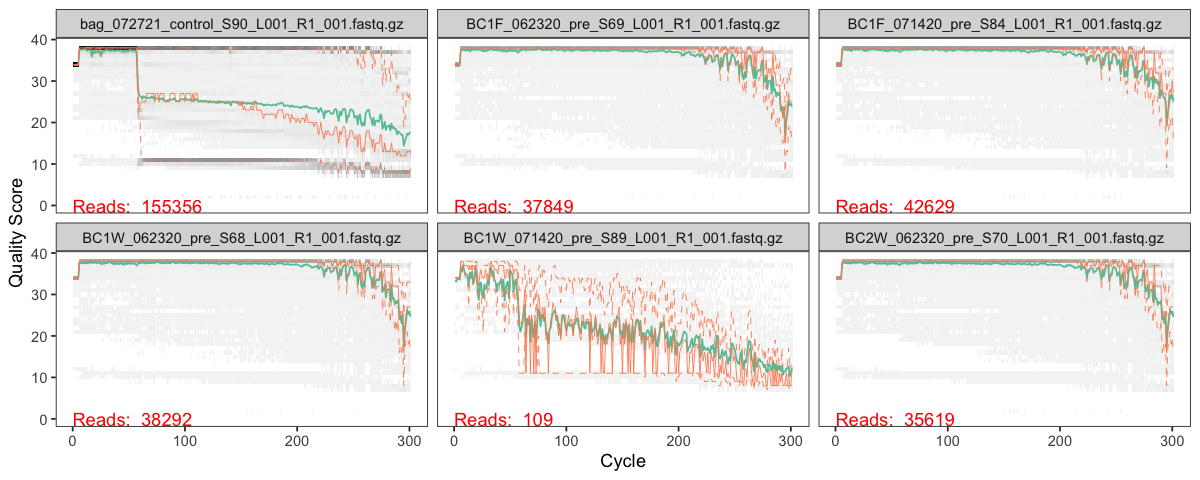

In [6]:
options(repr.plot.width=10, repr.plot.height=4)
plotQualityProfile(fnFs[1:6])
quality <- plotQualityProfile(fnFs)
ggsave('./read-quality-profile.pdf', plot= quality, device='pdf')

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 6949 rows containing missing values (geom_tile).”
Warning message:
“Removed 276 row(s) containing missing values (geom_path).”
Warning message:
“Removed 276 row(s) containing missing values (geom_path).”
Warning message:
“Removed 276 row(s) containing missing values (geom_path).”
Warning message:
“Removed 276 row(s) containing missing values (geom_path).”


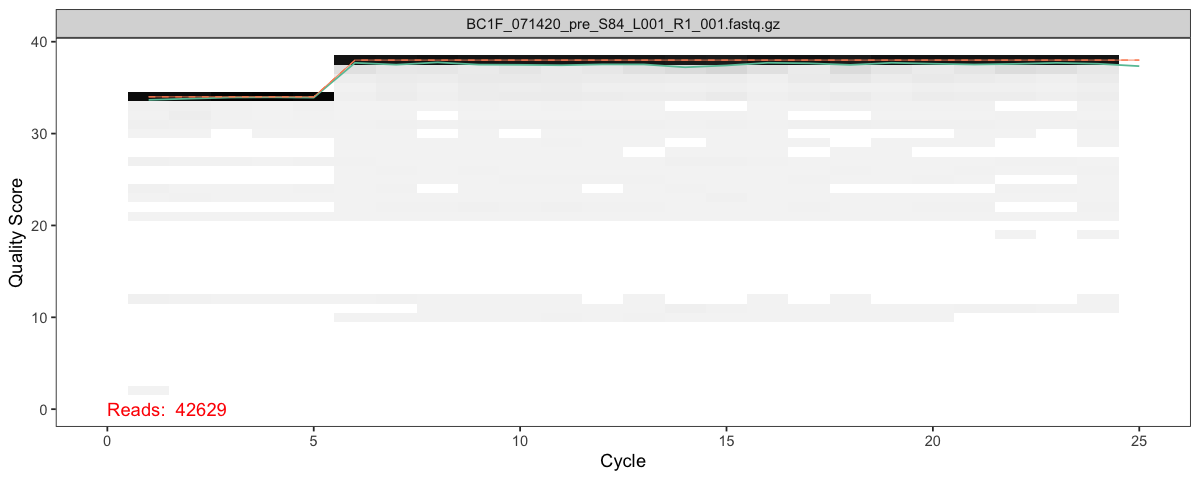

In [8]:
#zoom in on one:
options(repr.plot.width=10, repr.plot.height=4)
plotQualityProfile(fnFs[3:3])+
xlim(0,25)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“Removed 4533 rows containing missing values (geom_tile).”
Warning message:
“Removed 200 row(s) containing missing values (geom_path).”
Warning message:
“Removed 200 row(s) containing missing values (geom_path).”
Warning message:
“Removed 200 row(s) containing missing values (geom_path).”
Warning message:
“Removed 200 row(s) containing missing values (geom_path).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


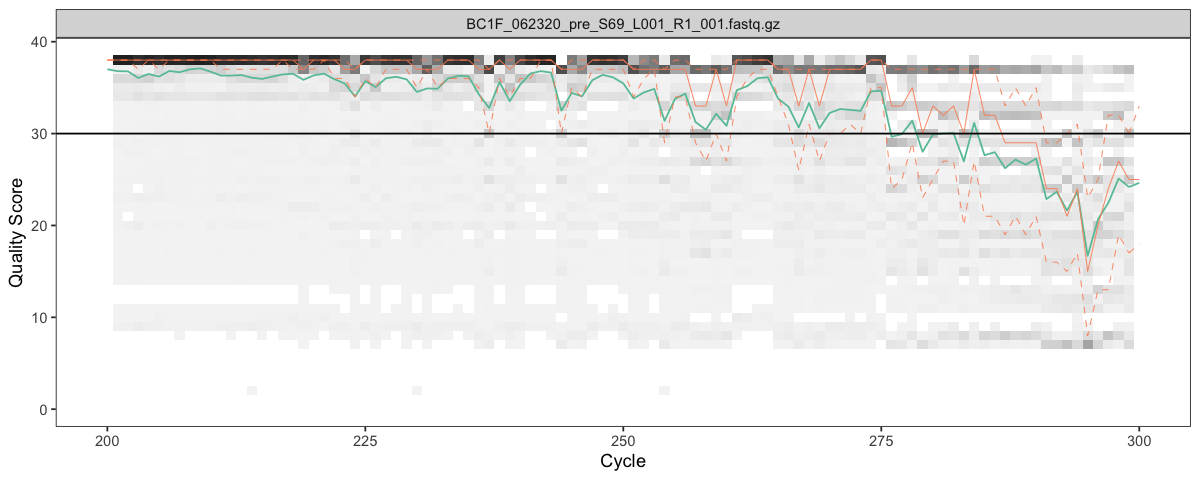

In [9]:
options(repr.plot.width=10, repr.plot.height=4)
plotQualityProfile(fnFs[2:2])+
xlim(200,300)+
geom_hline(aes(yintercept=30))

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


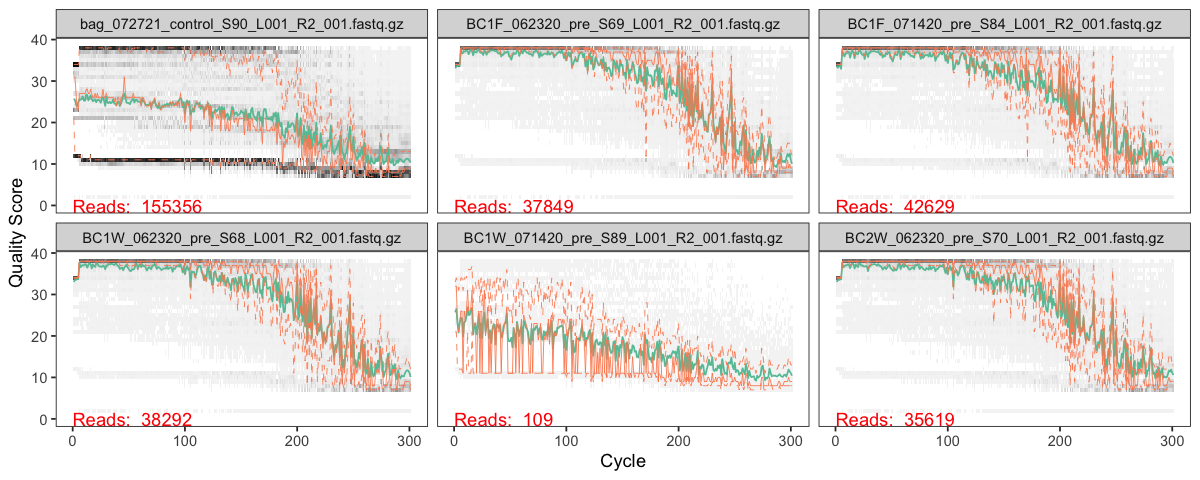

In [10]:
#inspect quality of reverse reads
options(repr.plot.width=10, repr.plot.height=4)
plotQualityProfile(fnRs[1:6])

## Trim and filter reads

In [11]:
setwd("/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/Stagnation/16S_analysis_2022")
path <- "./rawdata_stagnation_16S_2022/"
filtpath <-"./trimmeddata_stagnation_16S_2022/"
fns <- list.files(path, pattern="fastq.gz")

In [12]:
# Filtering (takes a while)
filterAndTrim(fwd = file.path(path,fns), filt = file.path(filtpath,fns), compress = TRUE,
  truncQ = 10, truncLen = 251, trimLeft = 5,
  minLen = 200, maxN = 0, minQ = 0, maxEE = 1, rm.phix = TRUE,
  n = 1e+05)

#should remove the barcode sample due to sequencing error that's unmatched
# https://support.illumina.com/bulletins/2016/04/adapter-trimming-why-are-adapter-sequences-trimmed-from-only-the--ends-of-reads.html

The filter removed all reads: ./trimmeddata_stagnation_16S_2022//BC1W_071420_pre_S89_L001_R2_001.fastq.gz not written.

The filter removed all reads: ./trimmeddata_stagnation_16S_2022//bottle_070821_control_S55_L001_R2_001.fastq.gz not written.

The filter removed all reads: ./trimmeddata_stagnation_16S_2022//CTCTAGAA-GACACTGA_S110_L001_R2_001.fastq.gz not written.

The filter removed all reads: ./trimmeddata_stagnation_16S_2022//D434_051420_pre_S2_L001_R2_001.fastq.gz not written.

The filter removed all reads: ./trimmeddata_stagnation_16S_2022//D6F_060520_pre_S106_L001_R2_001.fastq.gz not written.

The filter removed all reads: ./trimmeddata_stagnation_16S_2022//filterblank_071221_control_S56_L001_R2_001.fastq.gz not written.

The filter removed all reads: ./trimmeddata_stagnation_16S_2022//filterblank_073021_control_S91_L001_R2_001.fastq.gz not written.

The filter removed all reads: ./trimmeddata_stagnation_16S_2022//mock_1e6_111821_control2_S102_L001_R2_001.fastq.gz not written.



## Infer sequence variants

In [13]:
#move forward read files into a different folder 
setwd("/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/Stagnation/16S_analysis_2022")
forwards <-(list.files(filtpath, pattern="_R1_001.fastq.gz", full.names = TRUE))
for (i in forwards) {
    file.copy(i, "./forward_reads/")
    }
filtpath_f <-"./forward_reads/"

In [14]:
setwd("/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/Stagnation/16S_analysis_2022")
filts <- list.files(filtpath_f, pattern="fastq.gz", full.names=TRUE) #working with files zipped
sample.names <- sapply(strsplit(basename(filts), "_S"), `[`, 1)
names(filts) <- sample.names
filts <- filts[names(filts) != "Undetermined"]
filts <- filts[names(filts) != "CTCTAGAA-GACACTGA"]
sample.names <- names(filts)

filts

#need to only include forward reads so names aren't listed twice 
#can move R to diff folder OR just fix "pattern"

bag_072721_control 
        "./forward_reads//bag_072721_control_S90_L001_R1_001.fastq.gz" 
                                                       BC1F_062320_pre 
           "./forward_reads//BC1F_062320_pre_S69_L001_R1_001.fastq.gz" 
                                                       BC1F_071420_pre 
           "./forward_reads//BC1F_071420_pre_S84_L001_R1_001.fastq.gz" 
                                                       BC1W_062320_pre 
           "./forward_reads//BC1W_062320_pre_S68_L001_R1_001.fastq.gz" 
                                                       BC1W_071420_pre 
           "./forward_reads//BC1W_071420_pre_S89_L001_R1_001.fastq.gz" 
                                                       BC2W_062320_pre 
           "./forward_reads//BC2W_062320_pre_S70_L001_R1_001.fastq.gz" 
                                                       BC2W_071420_pre 
           "./forward_reads//BC2W_071420_pre_S85_L001_R1_001.fastq.gz" 
                                                       BC3F_062320_pre 
           "./forward_reads//BC3F_062320_pre_S72_L001_R1_001.fastq.gz" 
                                                       BC3F_071420_pre 
           "./forward_reads//BC3F_071420_pre_S87_L001_R1_001.fastq.gz" 
                                                       BC3W_062320_pre 
           "./forward_reads//BC3W_062320_pre_S71_L001_R1_001.fastq.gz" 
                                                       BC3W_071420_pre 
           "./forward_reads//BC3W_071420_pre_S86_L001_R1_001.fastq.gz" 
                                                       BC4F_062320_pre 
           "./forward_reads//BC4F_062320_pre_S74_L001_R1_001.fastq.gz" 
                                                       BC4F_071420_pre 
           "./forward_reads//BC4F_071420_pre_S67_L001_R1_001.fastq.gz" 
                                                       BC4W_062320_pre 
           "./forward_reads//BC4W_062320_pre_S73_L001_R1_001.fastq.gz" 
                                                       BC4W_071420_pre 
           "./forward_reads//BC4W_071420_pre_S88_L001_R1_001.fastq.gz" 
                                                 bottle_070821_control 
     "./forward_reads//bottle_070821_control_S55_L001_R1_001.fastq.gz" 
                                                       D119_051420_pre 
            "./forward_reads//D119_051420_pre_S1_L001_R1_001.fastq.gz" 
                                                       D119_052120_pre 
            "./forward_reads//D119_052120_pre_S9_L001_R1_001.fastq.gz" 
                                                       D119_060420_pre 
           "./forward_reads//D119_060420_pre_S17_L001_R1_001.fastq.gz" 
                                                       D119_060520_pre 
           "./forward_reads//D119_060520_pre_S29_L001_R1_001.fastq.gz" 
                                                       D119_061120_pre 
           "./forward_reads//D119_061120_pre_S32_L001_R1_001.fastq.gz" 
                                                       D119_061220_pre 
           "./forward_reads//D119_061220_pre_S38_L001_R1_001.fastq.gz" 
                                                       D119_071420_pre 
           "./forward_reads//D119_071420_pre_S48_L001_R1_001.fastq.gz" 
                                                        D1H_051420_pre 
             "./forward_reads//D1H_051420_pre_S6_L001_R1_001.fastq.gz" 
                                                       D1H_060420_post 
           "./forward_reads//D1H_060420_post_S27_L001_R1_001.fastq.gz" 
                                                        D1H_060420_pre 
            "./forward_reads//D1H_060420_pre_S26_L001_R1_001.fastq.gz" 
                                                        D1H_060520_pre 
            "./forward_reads//D1H_060520_pre_S30_L001_R1_001.fastq.gz" 
                                                        D1H_061220_pre 
            "./forward_reads//D1H_061220_pre_S45_L001_R1_001.fastq.gz" 
                    

In [15]:
# str(filts)
setwd("/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/Stagnation/16S_analysis_2022/")
getwd()

table(file.exists(filts))

[1] "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/Stagnation/16S_analysis_2022"


TRUE 
 109 

929628588 total bases in 3778978 reads from 109 samples will be used for learning the error rates.


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


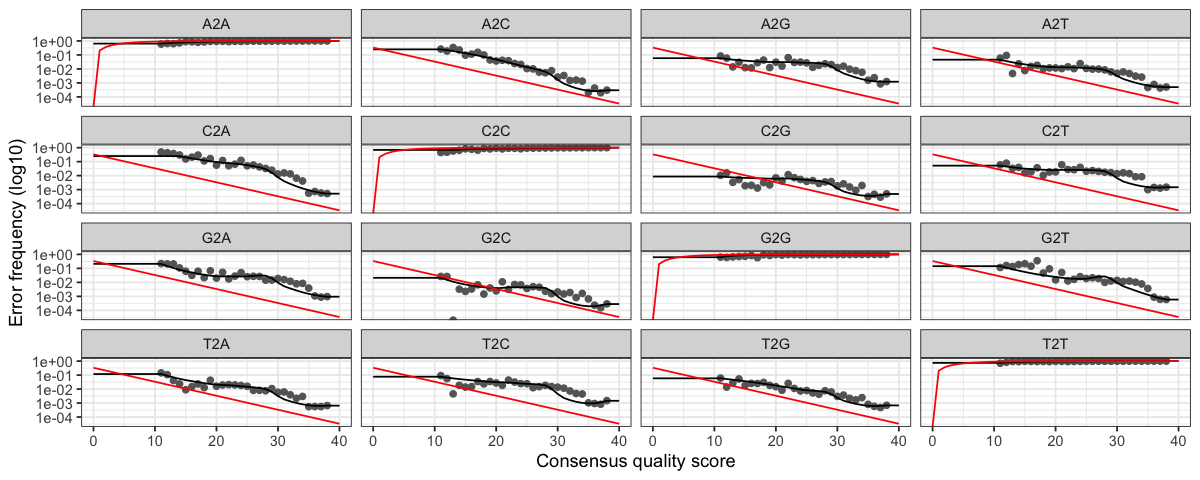

In [16]:
# Learn error rates (this takes 30 min on my laptop!)

set.seed(100)
err <- learnErrors(filts, nbases = 1e9, multithread=TRUE, randomize=TRUE) #default nbases = 1e8
plotErrors(err, nominalQ=TRUE)

#check here that black line fits black dots

In [17]:
ggsave('./dada2_estimated_error_rates1e9.pdf', device='pdf')

#could also save err rds
saveRDS(err, '~/err.rds')

Saving 7 x 7 in image

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


In [18]:
err <- readRDS('~/err.rds')

In [19]:
# Infer sequence variants
dds <- vector("list", length(sample.names))
names(dds) <- sample.names
for(sam in sample.names) {
  cat("Processing:", sam, "\n")
  derep <- derepFastq(filts[[sam]])
  dds[[sam]] <- dada(derep, err=err, multithread=TRUE)
}

Processing: bag_072721_control 
Sample 1 - 50575 reads in 2534 unique sequences.
Processing: BC1F_062320_pre 
Sample 1 - 27671 reads in 5482 unique sequences.
Processing: BC1F_071420_pre 
Sample 1 - 31727 reads in 6601 unique sequences.
Processing: BC1W_062320_pre 
Sample 1 - 30073 reads in 7336 unique sequences.
Processing: BC1W_071420_pre 
Sample 1 - 3 reads in 3 unique sequences.
Processing: BC2W_062320_pre 
Sample 1 - 27824 reads in 5167 unique sequences.
Processing: BC2W_071420_pre 
Sample 1 - 29128 reads in 5761 unique sequences.
Processing: BC3F_062320_pre 
Sample 1 - 26891 reads in 2478 unique sequences.
Processing: BC3F_071420_pre 
Sample 1 - 28659 reads in 4217 unique sequences.
Processing: BC3W_062320_pre 
Sample 1 - 26157 reads in 5297 unique sequences.
Processing: BC3W_071420_pre 
Sample 1 - 30820 reads in 4546 unique sequences.
Processing: BC4F_062320_pre 
Sample 1 - 26396 reads in 5709 unique sequences.
Processing: BC4F_071420_pre 
Sample 1 - 32923 reads in 2494 unique s

In [20]:
# Construct sequence table and write to disk
seqtab <- makeSequenceTable(dds)
saveRDS(seqtab, "~/seqtabn1e9.rds")

#not working because there are basically two samples with each name (are these F and R that haven't been merged, or duplicates?) https://github.com/benjjneb/dada2/issues/210 

In [21]:
dim(seqtab)

[1]  109 8666

There were 15692 sequences when learnErrors was run with nbases=1e8.

## Remove chimeras

In [22]:
seqtab.nochim <- removeBimeraDenovo(seqtab, method="consensus", multithread=TRUE, verbose=TRUE)

Identified 6075 bimeras out of 8666 input sequences.



In [23]:
dim(seqtab.nochim)

[1]  109 2591

In [24]:
sum(seqtab.nochim)/sum(seqtab) #about 16% of reads were removed 

[1] 0.8448798

There were 7521 nonchimeric sequences when learnErrors was run with nbases=1e8.

,Row.names,reads_filtered,reads_nochim,percent_chim
,<I<chr>>,<dbl>,<dbl>,<dbl>
10,BC3W_062320_pre,25745,16950,34.16197
84,mock_1e8_111821_control2,41986,27266,35.05931
4,BC1W_062320_pre,29429,18606,36.77665
79,mock_1e10_111821_control1,43528,19788,54.53961
80,mock_1e10_111821_control2,36567,15094,58.72235
5,BC1W_071420_pre,1,0,100.00000


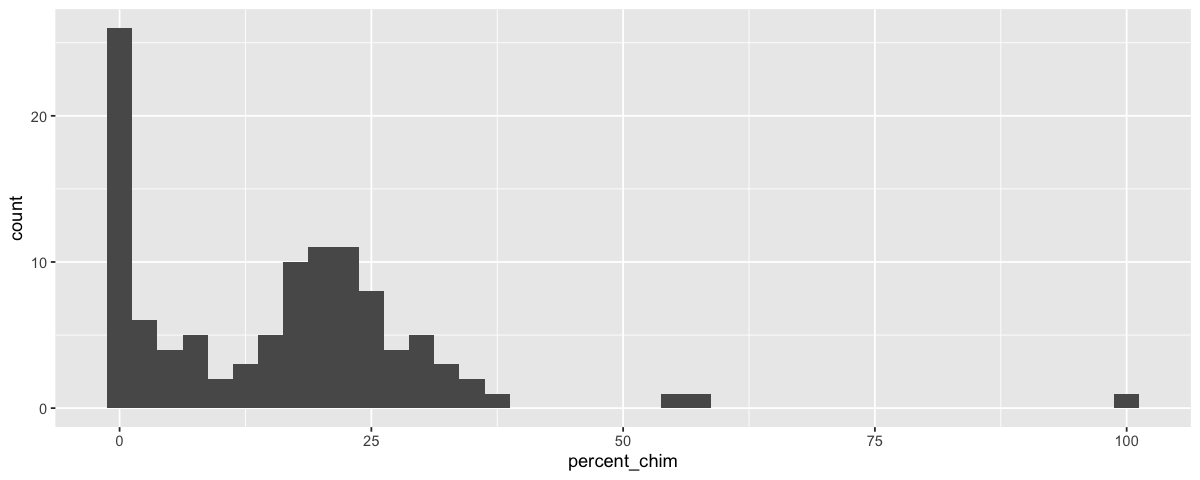

In [25]:
# investigate the percent of total reads that were chimeric
reads_filtered <- as.data.frame(rowSums(seqtab))
colnames(reads_filtered) <- 'reads_filtered'
reads_nochim <- as.data.frame(rowSums(seqtab.nochim))
colnames(reads_nochim) <- 'reads_nochim'
stats <- merge(reads_filtered, reads_nochim, by=0)
stats$percent_chim <- 100 * (stats$reads_filtered - stats$reads_nochim) / stats$reads_filtered
tail(stats[order(stats$percent_chim), ])
ggplot(stats, aes(x=percent_chim))+
    geom_histogram(binwidth=2.5)

#ideally percent chimeras should be <5%


In [26]:
# stats
length(stats$Row.names[stats$reads_nochim > 0])

[1] 108

three samples had a very high percentage of chimeric reads. (Hannah updated)

## Assign taxonomy

In [27]:
tax <- assignTaxonomy(seqtab.nochim, "./tax/silva_nr99_v138.1_train_set.fa.gz", multithread=TRUE)


In [28]:
taxa <- addSpecies(tax, "./tax/silva_species_assignment_v138.1.fa.gz") #hannah added this optional step

taxa.print <- taxa # Removing sequence rownames for display only
rownames(taxa.print) <- NULL
head(taxa.print)
sort(unique(taxa.print[,"Species"])) 
#oligotropha and oligotrophus possibly found in oligotrophic environments?

Kingdom,Phylum,Class,Order,Family,Genus,Species
Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Comamonadaceae,Curvibacter,NA
Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Beijerinckiaceae,Microvirga,NA
Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Phenylobacterium,NA
Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Qipengyuania,NA
Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Blastomonas,NA
Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Pseudoalteromonadaceae,Pseudoalteromonas,NA


[1] "aerolata"           "aerosaccus"         "aestuarii"         
  [4] "altamirensis"       "appendicis"         "aquatica"          
  [7] "aquatilis"          "aromaticivorans"    "aureus"            
 [10] "autotrophicus"      "bacteriovorus"      "brasiliensis"      
 [13] "brevitalea"         "butzleri"           "canicola"          
 [16] "capsiferriformans"  "cecorum"            "celer"             
 [19] "cf."                "clevelandensis"     "cochlearium"       
 [22] "commune"            "cryaerophilus"      "dehalogenans"      
 [25] "delicata"           "denitrificans"      "desiccabilis"      
 [28] "duerdenii"          "durum"              "esteraromaticum"   
 [31] "eurypsychrophila"   "excentricus"        "facile"            
 [34] "falsenii"           "falsum"             "fennica"           
 [37] "fermentans"         "flava"              "fontis"            
 [40] "frigida"            "fructosivorans"     "gandavensis"       
 [43] "geojensis"          "goheungense"        "granulorum"        
 [46] "haemoglobinophilus" "haemolyticus"       "halotolerans"      
 [49] "illinoisensis"      "jiangduensis"       "koreense"          
 [52] "koreensis"          "kujiense"           "lacus"             
 [55] "lacusekhoensis"     "latericoloratus"    "lavamentivorans"   
 [58] "lenta"              "lipocyclicus"       "lithotrophicus"    
 [61] "luteolum"           "luteus"             "lwoffii"           
 [64] "maltophilia"        "marinus"            "massiliensis"      
 [67] "metagenome"         "metallidurans"      "minor"             
 [70] "mobilis"            "mucilaginosa"       "mucosissima"       
 [73] "muris"              "namhaensis"         "naphthae"          
 [76] "nitrogenifigens"    "odontolyticus"      "oestradiolicum"    
 [79] "oligomobilis"       "oligotropha"        "oligotrophus"      
 [82] "otitis"             "palleronii"         "palustris"         
 [85] "parauberis"         "parva"              "parvum"            
 [88] "pasteri"            "periodonticum"      "petroleiphilum"    
 [91] "pogonae"            "polygranulatus"     "prevotii"          
 [94] "pronyense"          "rhizosphaerae"      "rigui"             
 [97] "rimae"              "rivuli"             "ruminis"           
[100] "saccharofermentans" "saccharophilum"     "saemangeumensis"   
[103] "salmoneum"          "sanguinis"          "similis"           
[106] "soli"               "spiritivorum"       "starrii"           
[109] "stellulata"         "subterraneum"       "succinatimandens"  
[112] "sulfuroxydans"      "suwonense"          "taihuense"         
[115] "testudinis"         "thuringiensis"      "tibetensis"        
[118] "universalis"        "unzii"              "ureae"             
[121] "vaginalis"          "varani"             "virosa"            
[124] "vulgatus"           "witflariensis"      "yanshanensis"      
[127] "zoogloeoides"

In [29]:
# Write to disk

saveRDS(seqtab.nochim, "./seqtab_finaln1e9.rds")
saveRDS(tax, "./tax_finaln1e9.rds")
saveRDS(taxa, "./taxa_finaln1e9.rds")

In [30]:
taxa.print <- tax # Removing sequence rownames for display only
rownames(taxa.print) <- NULL
head(taxa.print)
sort(unique(taxa.print[,"Genus"])) #there's Legionella, Mycobacterium, Nitrospira, Nitrosomonas, 

Kingdom,Phylum,Class,Order,Family,Genus
Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Comamonadaceae,Curvibacter
Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Beijerinckiaceae,Microvirga
Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Phenylobacterium
Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Qipengyuania
Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Blastomonas
Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Pseudoalteromonadaceae,Pseudoalteromonas


[1] "[Desulfobacterium] catecholicum group"             
  [2] "1174-901-12"                                       
  [3] "28-YEA-48"                                         
  [4] "966-1"                                             
  [5] "Abditibacterium"                                   
  [6] "Acetoanaerobium"                                   
  [7] "Acetobacter"                                       
  [8] "Acetobacterium"                                    
  [9] "Achromobacter"                                     
 [10] "Acidaminobacter"                                   
 [11] "Acidibacter"                                       
 [12] "Acidiphilium"                                      
 [13] "Acidipropionibacterium"                            
 [14] "Acidovorax"                                        
 [15] "Acinetobacter"                                     
 [16] "Actimicrobium"                                     
 [17] "Actinomyces"                                       
 [18] "Aeromonas"                                         
 [19] "Afipia"                                            
 [20] "Agrococcus"                                        
 [21] "Agromyces"                                         
 [22] "Alcaligenes"                                       
 [23] "Aliidiomarina"                                     
 [24] "Aliihoeflea"                                       
 [25] "Alishewanella"                                     
 [26] "Alkalibacter"                                      
 [27] "Alkalibacterium"                                   
 [28] "Alkanindiges"                                      
 [29] "Alloiococcus"                                      
 [30] "Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium"
 [31] "alphaI cluster"                                    
 [32] "Altererythrobacter"                                
 [33] "Ammoniphilus"                                      
 [34] "Amphiplicatus"                                     
 [35] "Anaerobacterium"                                   
 [36] "Anaerococcus"                                      
 [37] "Anaerocolumna"                                     
 [38] "Anaerolineaceae UCG-001"                           
 [39] "Anaeromyxobacter"                                  
 [40] "Anaerostignum"                                     
 [41] "Anaerovorax"                                       
 [42] "Anoxybacillus"                                     
 [43] "Aphanizomenon NIES81"                              
 [44] "Aquabacterium"                                     
 [45] "Aquamonas"                                         
 [46] "Aquicella"                                         
 [47] "Aquincola"                                         
 [48] "Aquipuribacter"                                    
 [49] "Aquisphaera"                                       
 [50] "Arcicella"                                         
 [51] "Arcobacter"                                        
 [52] "Arenimonas"                                        
 [53] "Asticcacaulis"                                     
 [54] "Atopobium"                                         
 [55] "Aureimonas"                                        
 [56] "Azohydromonas"                                     
 [57] "Azomonas"                                          
 [58] "Azospirillum"                                      
 [59] "Azovibrio"                                         
 [60] "Bacillus"                                          
 [61] "Bacteriovorax"                                     
 [62] "Bacteroides"                                       
 [63] "Bdellovibrio"                                      
 [64] "Bellilinea"                                        
 [65] "Bifidobacterium"                                   
 [66] "Blastocatella"                                     
 [67] "Blastococcus"                                      
 [68] "Blastomonas"                              

# Evaluate accuracy using the mock community

In [31]:
unqs.mock <- seqtab.nochim["mock_1e10_111821_control2",]
unqs.mock <- sort(unqs.mock[unqs.mock>0], decreasing=TRUE) # Drop ASVs absent in the Mock
cat("DADA2 inferred", length(unqs.mock), "sample sequences present in the Mock community.\n")

DADA2 inferred 13 sample sequences present in the Mock community.


In [32]:
mock.path <- "./ZymoBIOMICS.STD.refseq.v2/Genomes/"
mock.ref <- getSequences(file.path(mock.path, "seqcombined.fasta"))
match.ref <- sum(sapply(names(unqs.mock), function(x) any(grepl(x, mock.ref))))
cat("Of those,", sum(match.ref), "were exact matches to the expected reference sequences.\n")

# chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Ffiles.zymoresearch.com%2Fprotocols%2F_d6300_zymobiomics_microbial_community_standard.pdf&clen=336725&chunk=true
# mock should be (based on 16S only): 4.2% P aeruginosa, 10.1% E coli, 10.4% Salmonella enterica, 18.4% Lactobacillus fermentum, 9.9% Enterococcus faecalis, 15.5% Staph aureus, 14.1% Listeria monocytogenes, 17.4% Bacillus subtilis

Of those, 9 were exact matches to the expected reference sequences.


# Make phyloseq object and save

In [3]:
setwd("/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/Stagnation/16S_analysis_2022")
tax <- readRDS('./tax_finaln1e9.rds')
seqtab.nochim <- readRDS('./seqtab_finaln1e9.rds')

# Make a data.frame holding the sample data where rownames are sampleIDs and headers are metadata parameters
metadata <- read.table('./metadata.tsv', 
                       header=TRUE, row.names = 1, sep="\t",quote="", stringsAsFactors=FALSE, fill= FALSE)
#needed to make sure metadata columns didn't have apostrophes or commas in the notes columns

In [4]:
metadata$id <- row.names(metadata)
row.names(metadata)

[1] "D119_051420_pre"               "D1H_051420_pre"               
  [3] "D3F_051420_pre"                "D434_051420_pre"              
  [5] "D5B_051420_pre"                "D641_051420_post"             
  [7] "D641_051420_pre"               "D6F_051420_post"              
  [9] "D6F_051420_pre"                "D7C_051420_post"              
 [11] "D7C_051420_pre"                "D7CH_051420_post"             
 [13] "D7H_051420_post"               "D7H_051420_pre"               
 [15] "D119_052120_pre"               "D1H_052120_pre"               
 [17] "D3F_052120_pre"                "D434_052120_pre"              
 [19] "D5B_052120_pre"                "D641_052120_pre"              
 [21] "D6F_052120_pre"                "D7C_052120_post"              
 [23] "D7C_052120_pre"                "D7H_052120_post"              
 [25] "D7H_052120_pre"                "D119_060420_pre"              
 [27] "D119_060420_post"              "D1H_060420_pre"               
 [29] "D1H_060420_post"               "D3F_060420_pre"               
 [31] "D3F_060420_post"               "D434_060420_pre"              
 [33] "D434_060420_post"              "D5B_060420_pre"               
 [35] "D5B_060420_post"               "D641_060420_pre"              
 [37] "D641_060420_post"              "D6F_060420_pre"               
 [39] "D6F_060420_post"               "D7C_060420_pre"               
 [41] "D7C_060420_post"               "D7H_060420_pre"               
 [43] "D7H_060420_post"               "D119_060520_pre"              
 [45] "D1H_060520_pre"                "D3F_060520_pre"               
 [47] "D434_060520_pre"               "D5B_060520_pre"               
 [49] "D641_060520_pre"               "D6F_060520_pre"               
 [51] "D7C_060520_pre"                "D7H_060520_pre"               
 [53] "D1H_061120_post"               "D1H_061120_pre"               
 [55] "D119_061120_pre"               "D119_061120_post"             
 [57] "D3F_061120_pre"                "D3F_061120_post"              
 [59] "D434_061120_pre"               "D434_061120_post"             
 [61] "D5B_061120_pre"                "D5B_061120_post"              
 [63] "D641_061120_pre"               "D641_061120_post"             
 [65] "D6F_061120_pre"                "D6F_061120_post"              
 [67] "D7C_061120_pre"                "D7C_061120_post"              
 [69] "D7H_061120_pre"                "D7H_061120_post"              
 [71] "D119_061220_pre"               "D1H_061220_pre"               
 [73] "D3F_061220_pre"                "D434_061220_pre"              
 [75] "D5B_061220_pre"                "D641_061220_pre"              
 [77] "D6F_061220_pre"                "D7C_061220_pre"               
 [79] "D7H_061220_pre"                "DMain_061120_not_flushed_main"
 [81] "DMain_061120_main"             "filterblank_062821_control"   
 [83] "filterblank_062921_control"    "S3F_060520_pre"               
 [85] "S3KC_060520_pre"               "S4KH_060520_pre"              
 [87] "S6KC_060520_pre"               "S7KH_060520_pre"              
 [89] "BC1W_062320_pre"               "BC1F_062320_pre"              
 [91] "BC2W_062320_pre"               "BC3W_062320_pre"              
 [93] "BC3F_062320_pre"               "BC4W_062320_pre"              
 [95] "BC4F_062320_pre"               "SBGF_062320_pre"              
 [97] "SB1W_062320_pre"               "SB1BC_062320_pre"             
 [99] "SB2W_062320_pre"               "SB3W_062320_pre"              
[101] "SB4W_062320_pre"               "SB5W_062320_pre"              
[103] "SB6W_062320_pre"               "SB7W_062320_pre"              
[105] "SB7BC_062320_pre"              "SB8W_062320_pre"              
[107] "SB8BC_062320_pre"              "filterblank_070621_control"   
[109] "BC1W_071420_pre"               "BC1F_071420_pre"              
[111] "BC2W_071420_pre"               "BC3W_071420_pre"              
[113] "BC3F_071420_pre"               "BC4W_071420_pre"              
[115] "filte

In [6]:
# Construct phyloseq object from dada2 outputs and metadata table
ps <- phyloseq(otu_table(seqtab.nochim, taxa_are_rows=FALSE), 
               sample_data(metadata), 
               tax_table(tax))

#export the sequences to fasta for other analyses
uniquesToFasta(seqtab.nochim, "./all_seqs.fasta")


In [7]:
ps_raw <- filter_taxa(ps, function(x) sum(x) > 0, TRUE) #keep only seqs that had reads

In [8]:
# save
saveRDS(ps_raw, "./phyloseq_object.rds")

In [9]:
# str(ps_raw)
nsamples(ps_raw)

[1] 109